## Imports

In [24]:
import os
from pathlib import Path
from typing import Optional, Union
import warnings

import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

from .src.helpers import get_top_directory, compute_dprime, compute_criterion
from .src.preprocessing import encode_distance_setting, encode_number_of_objects

## Load Data

In [23]:
path_all = Path(os.getcwd()).parent / 'data' / 'processed_data' / 'cleaned_shape_experiment_1.csv'  # all data, cleaned up for SDT
path_sum = Path(os.getcwd()).parent / 'data' / 'processed_data' / 'hit_fa_summary_shape_experiment_1.csv' # summary DataFrame

In [3]:
df = pd.read_csv(path_all)
summary = pd.read_csv(path_sum)

In [4]:
df.shape

(14800, 22)

In [5]:
df.head(2)

,participant,distance_setting,number_of_objects,trial_number,target_present,ran,order,response_yes,yes_no_correct,hit,...,rt_where_sec,response_where_x,response_where_y,target_pos_x,target_pos_y,click_distance_deg,distance_shapecomp,background_shape_idx,proto_object_idx,date_str
0,SR,low,3,1,False,1.0,0.0,0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,-1.0,2023-06-26_15h38.26.579
1,SR,low,3,2,True,1.0,1.0,1.0,1.0,1,...,0.303415,-2.645458,-6.242093,-5.434043,-1.889708,5.169086,0.514986,0.0,39.0,2023-06-26_15h38.26.579


In [6]:
summary.shape

(146, 10)

In [7]:
summary.head(2)

,participant,distance_setting,number_of_objects,n_hit,n_fa,n_signal,n_noise,proportion_correct,hit_rate,false_alarm_rate
0,DB,high,2,46,5,50,50,0.91,0.903846,0.115385
1,DB,high,3,47,2,50,50,0.95,0.923077,0.057692


## Explore Data wih Plots

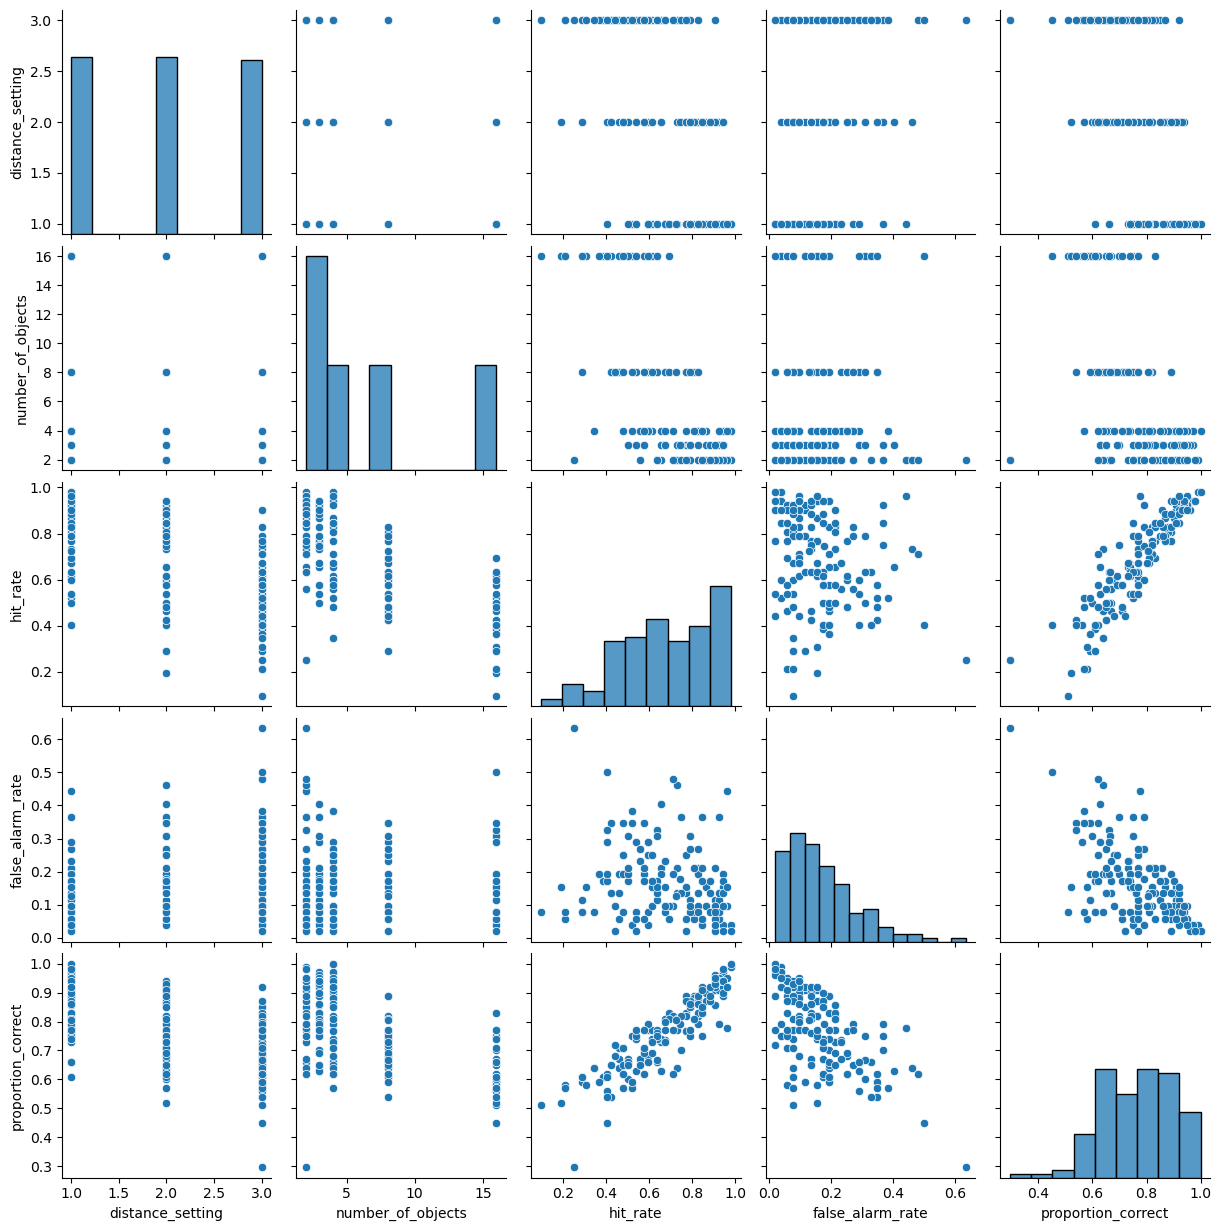

In [8]:
variables = [
    'distance_setting',
    'number_of_objects',
    'hit_rate',
    'false_alarm_rate',
    'proportion_correct',
]

# catch seaborn warning
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # map distance_setting to numerical values for automatic plotting
    # harder settings receive higher numerical values
    ds_map = {'low' : 3, 'mid' : 2, 'high' : 1}
    sns.pairplot(summary.replace(ds_map, regex=True, inplace=False), x_vars=variables, y_vars=variables)

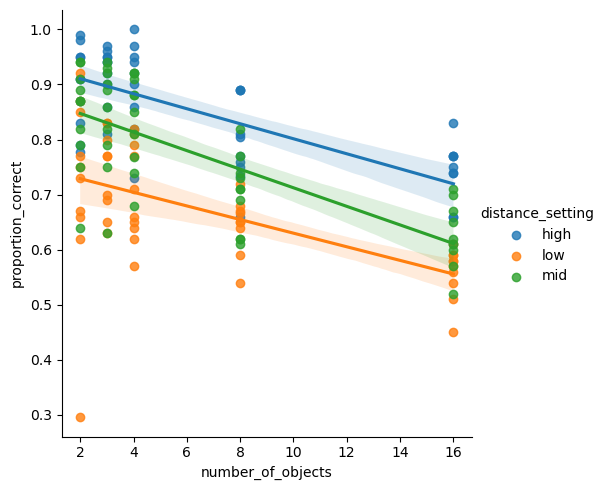

In [9]:
# catch seaborn warning
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # map distance_setting to numerical values for automatic plotting
    sns.lmplot(x='number_of_objects', y='proportion_correct', hue='distance_setting', data=summary, fit_reg=True)

In [10]:
# calculate the distance to the target from the center
df['target_distance_from_center'] = np.sqrt((df['target_pos_x'] + df['target_pos_y']) ** 2)

# display summary statistics over x, y and dist
pd.DataFrame.from_dict({'target_pos_x' : df['target_pos_x'].describe(), 'target_pos_y' : df['target_pos_y'].describe(), 'target_distance_from_center' : df['target_distance_from_center'].describe()})

,target_pos_x,target_pos_y,target_distance_from_center
count,7400.000000,7400.000000,7400.000000
mean,0.016696,-0.062183,8.166892
std,6.555626,6.603153,4.563600
min,-12.977193,-12.976683,0.006113
25%,-5.554223,-5.732612,4.496272
50%,-0.048782,-0.179013,8.039150
75%,5.677901,5.618683,11.610029
max,12.904990,12.893376,18.325970


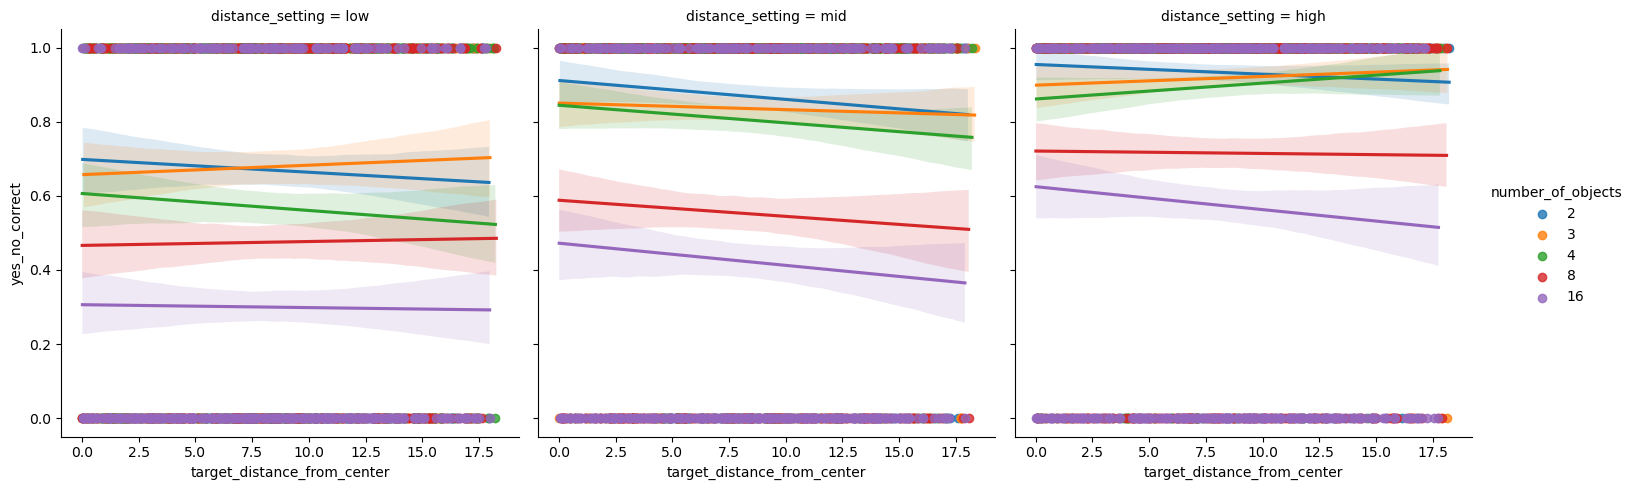

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # map distance_setting to numerical values for automatic plotting
    sns.lmplot(x='target_distance_from_center', y='yes_no_correct', hue='number_of_objects', col='distance_setting', data=df, fit_reg=True)

## Calculate Point Estimates Based on the Data

Encode distance_setting and number_of_obejcts as cardinal numerical values.

In [29]:
df['distance_setting_code']  = encode_distance_setting(df['distance_setting'])
df['number_of_objects_code'] = encode_number_of_objects(df['number_of_objects'])

summary['distance_setting_code']  = encode_distance_setting(summary['distance_setting'])
summary['number_of_objects_code'] = encode_number_of_objects(summary['number_of_objects'])

print('distance_setting_code' in df.columns      and 'number_of_objects_code' in df.columns)
print('distance_setting_code' in summary.columns and 'number_of_objects_code' in summary.columns)

True
True


Add point estimates to each participant's data in the summary.

In [38]:
summary['dprime'] = compute_dprime(summary['hit_rate'], summary['false_alarm_rate'])
summary['lambda'] = compute_criterion(summary['false_alarm_rate'])

summary[['dprime', 'lambda']].describe()

,dprime,lambda
count,146.000000,146.000000
mean,1.621773,1.065357
std,0.914764,0.470423
min,-1.018592,-0.344102
25%,0.868500,0.801095
50%,1.572630,1.020076
75%,2.301287,1.426077
max,4.139804,2.069902


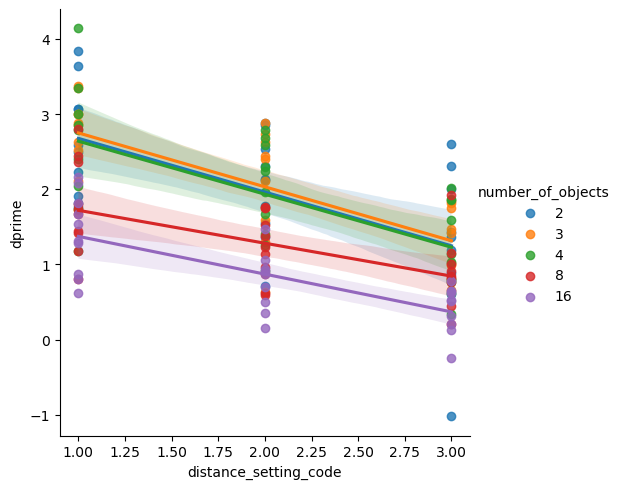

In [42]:
# catch seaborn warning
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # map distance_setting to numerical values for automatic plotting
    sns.lmplot(x='distance_setting_code', y='dprime', hue='number_of_objects', data=summary, fit_reg=True)

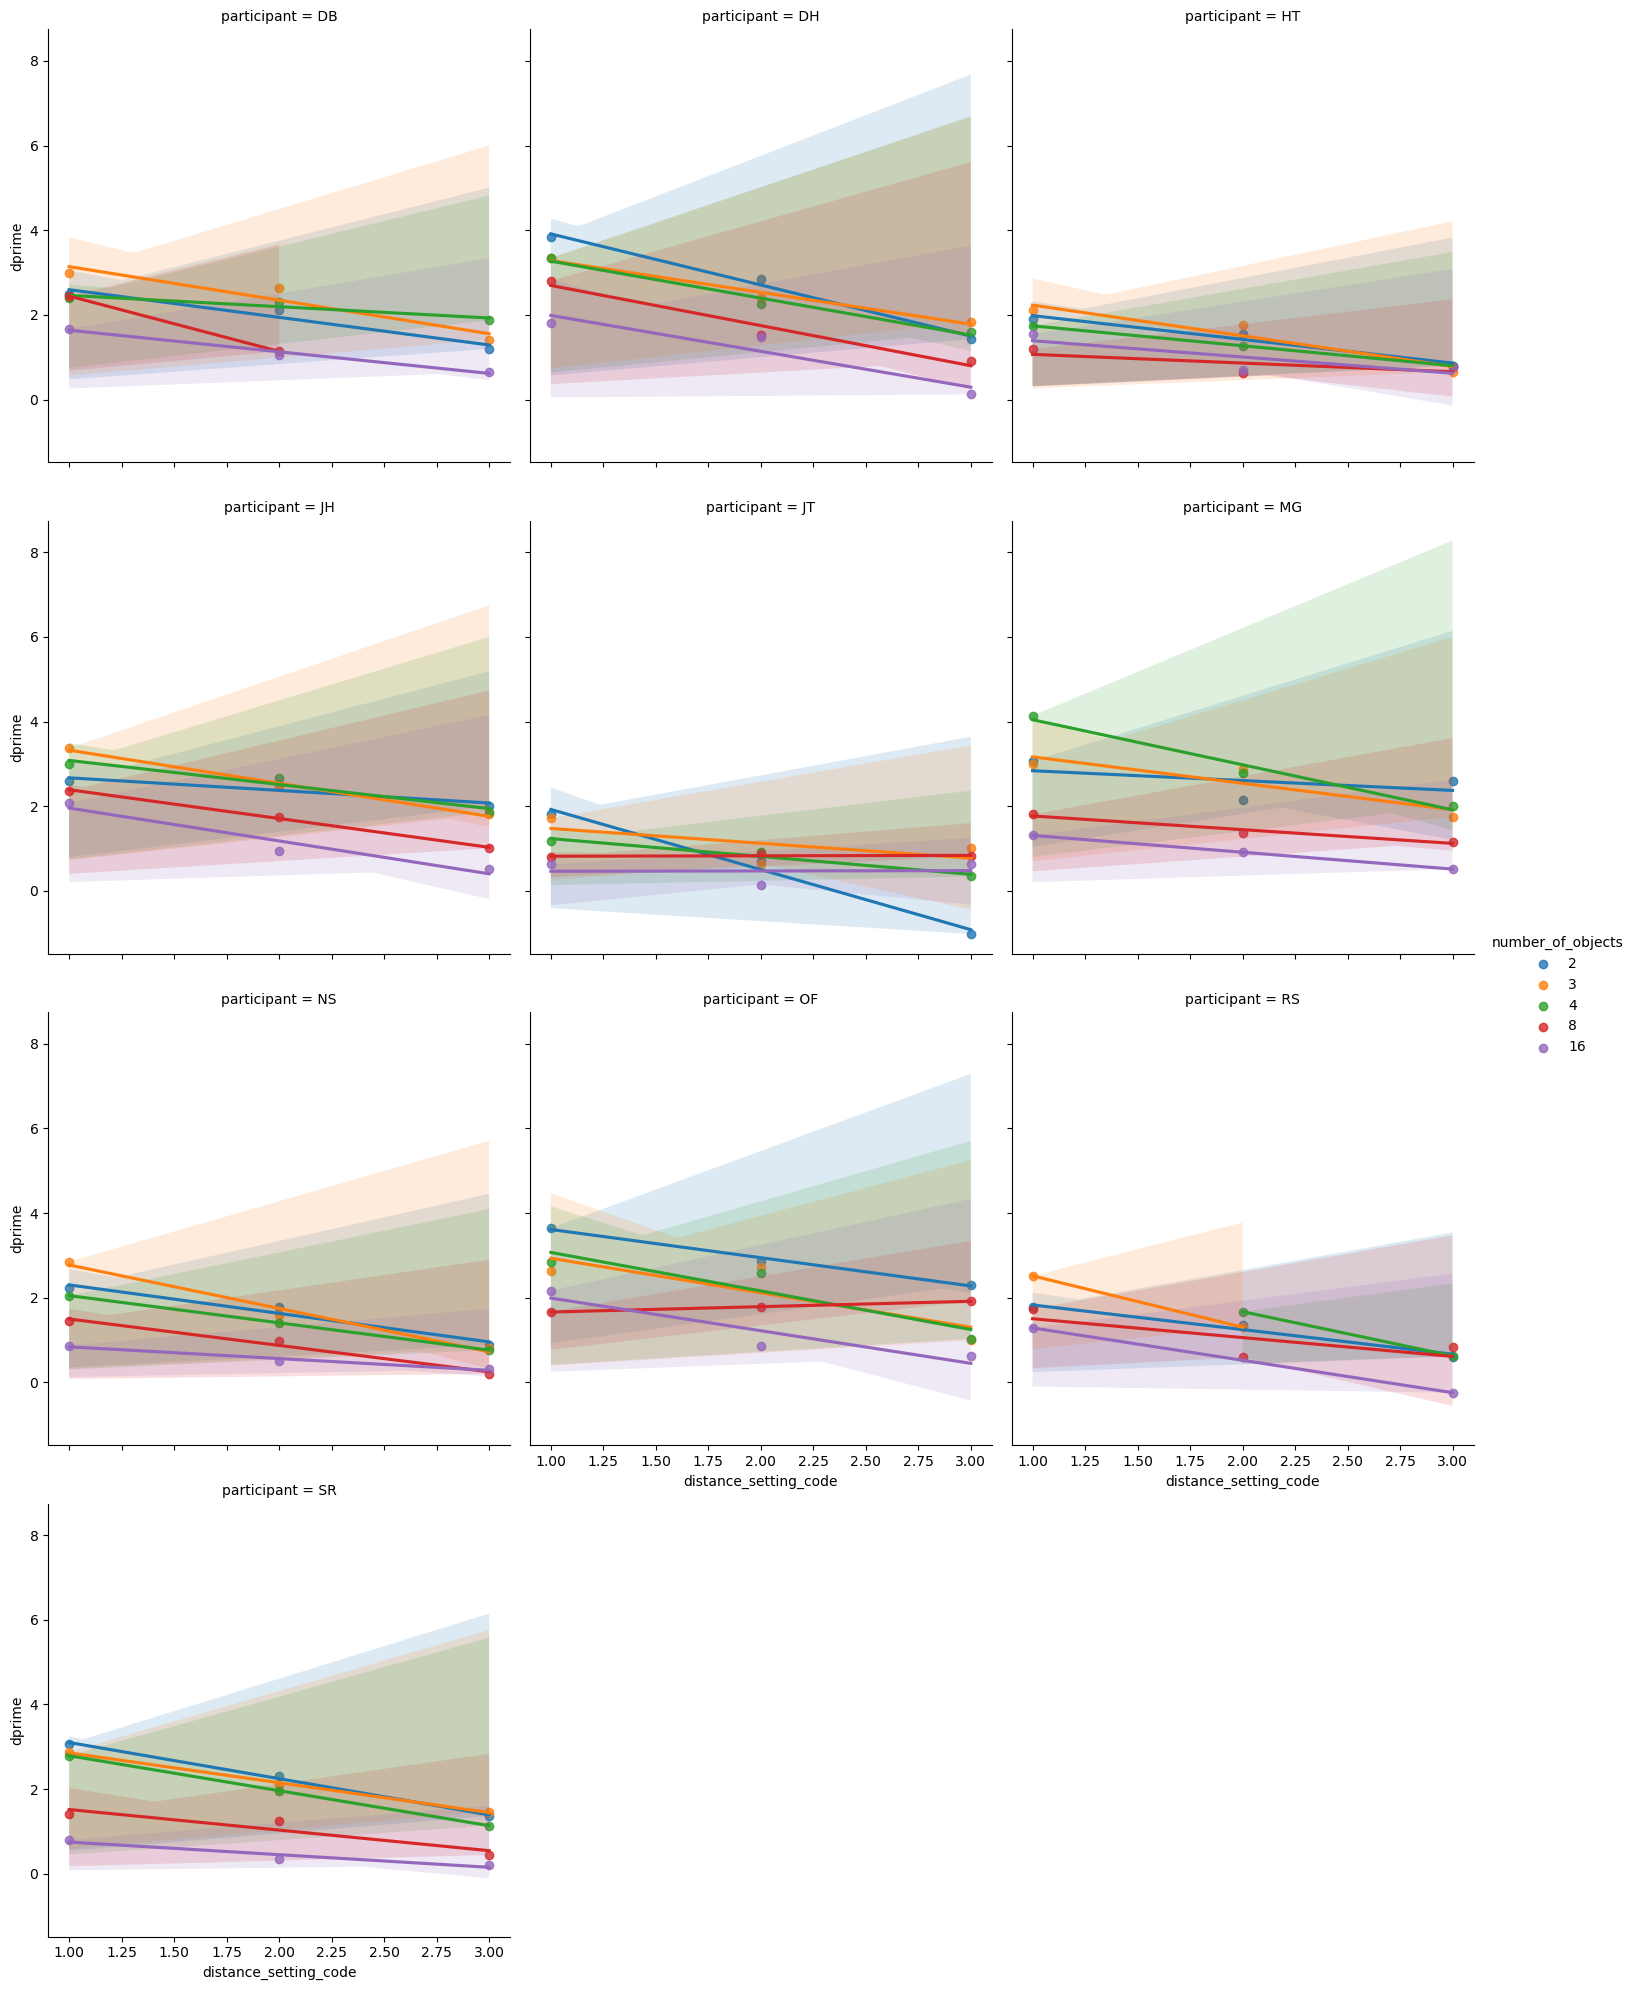

In [41]:
# catch seaborn warning
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # map distance_setting to numerical values for automatic plotting
    sns.lmplot(x='distance_setting_code', y='dprime', hue='number_of_objects', col='participant', col_wrap=3, data=summary, fit_reg=True)

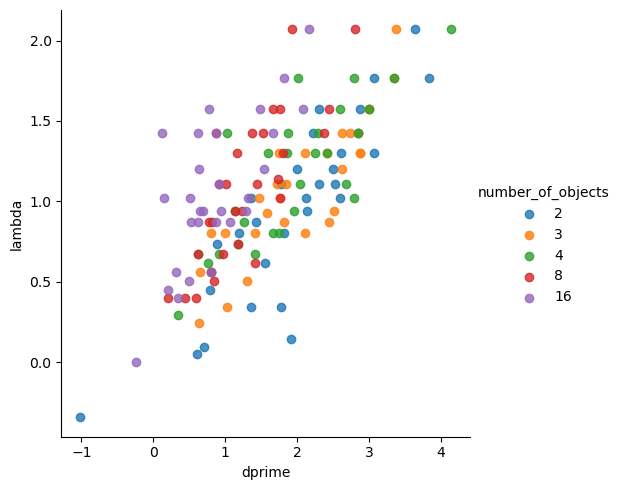

In [37]:
# catch seaborn warning
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # map distance_setting to numerical values for automatic plotting
    sns.lmplot(x='dprime', y='lambda', hue='number_of_objects', data=summary, fit_reg=False)